In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [137]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names = ['id','clump_thickness','Uniform_Cell_Size','Uniform_Cell_Shape','Marginal_Adhesion',
         'Single_Epithelial_Size','Bare_Nuclei','Bland_Chromatin','Normal_Nucleoli','Mitoses','Class'
        ]

df = pd.read_csv(url,header=None,names=names)
df.head()

,id,clump_thickness,Uniform_Cell_Size,Uniform_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
id                        699 non-null int64
clump_thickness           699 non-null int64
Uniform_Cell_Size         699 non-null int64
Uniform_Cell_Shape        699 non-null int64
Marginal_Adhesion         699 non-null int64
Single_Epithelial_Size    699 non-null int64
Bare_Nuclei               699 non-null object
Bland_Chromatin           699 non-null int64
Normal_Nucleoli           699 non-null int64
Mitoses                   699 non-null int64
Class                     699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [139]:
df['Bare_Nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [140]:
len(df[df['Bare_Nuclei']=='?'])

16

In [141]:
df[df['Bare_Nuclei']=='?']

,id,clump_thickness,Uniform_Cell_Size,Uniform_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


In [142]:
df.replace('?',-99999,inplace=True)

In [143]:
df['Bare_Nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', -99999, '5', '8', '6'],
      dtype=object)

In [144]:
#df['Bare_Nuclei'] = pd.to_numeric(df['Bare_Nuclei'])

In [145]:
df.describe()

,id,clump_thickness,Uniform_Cell_Size,Uniform_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Size,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AF3963F898>,
      dtype=object)

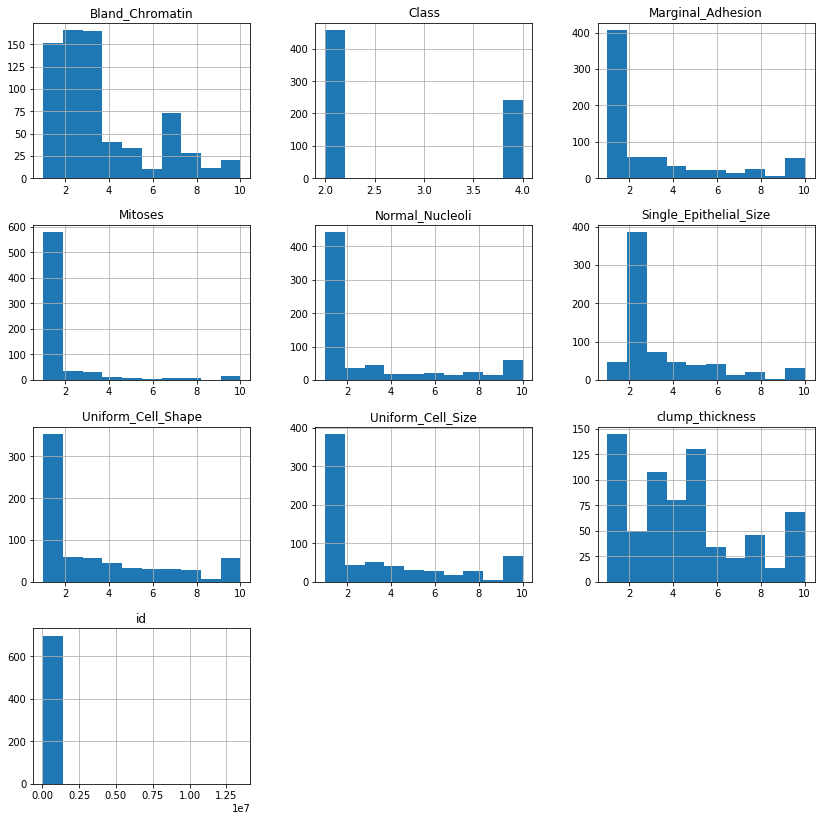

In [146]:
df.hist(figsize=(14,14))

In [147]:
X = df.drop(['Class','id'],axis=1,)
y = df['Class']

In [148]:
from sklearn.model_selection import train_test_split

In [149]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,random_state=42,test_size=0.2)
Xtrain.shape,ytrain.shape,Xtest.shape,ytest.shape

((559, 9), (559,), (140, 9), (140,))

In [150]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [151]:
from sklearn.model_selection import KFold,cross_val_score

In [152]:
models = []
models.append(('KNN',KNeighborsClassifier(n_neighbors=5)))
models.append(('SVM',SVC()))
results = []
names = []
for name,model in models:
    kfold = KFold(n_splits=10,random_state=42)
    cv_results = cross_val_score(model,Xtrain,ytrain,cv=kfold,scoring='accuracy')
    names.append(name)
    results.append(cv_results)
    print(name,cv_results.mean(),cv_results.std())

KNN 0.9642207792207792 0.02525456495576075
SVM 0.9570779220779221 0.02140780181962929


C:\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'aut

In [153]:
model = KNeighborsClassifier(n_neighbors=5)

In [154]:
model.fit(Xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [155]:
pred = model.predict(Xtest)

In [156]:
np.array(ytest)

array([2, 2, 2, 4, 2, 2, 2, 4, 4, 4, 2, 4, 2, 2, 2, 4, 2, 4, 4, 4, 4, 2,
       4, 2, 4, 2, 2, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2,
       4, 4, 2, 2, 4, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2,
       2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 4, 2, 2, 4,
       2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 4, 4, 2, 2,
       4, 2, 4, 2, 4, 2, 2, 2], dtype=int64)

In [157]:
from sklearn.metrics import classification_report,confusion_matrix

In [158]:
confusion_matrix(ytest,pred)

array([[94,  1],
       [ 1, 44]], dtype=int64)

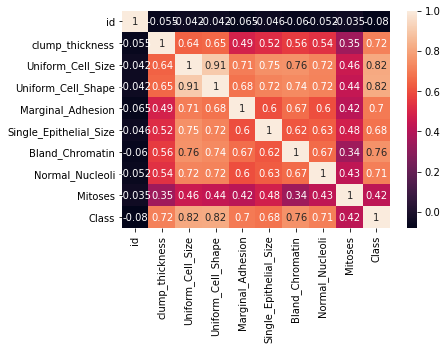

In [159]:
sns.heatmap(df.corr(),annot=True)

In [160]:
k = 0
z = []
for i,j in zip(pred,ytest):
    if i!=j:
        z.append(k)
    k+=1
z

[54, 110]

In [168]:
df.loc[54]

id                        1110524
clump_thickness                10
Uniform_Cell_Size               5
Uniform_Cell_Shape              5
Marginal_Adhesion               6
Single_Epithelial_Size          8
Bare_Nuclei                     8
Bland_Chromatin                 7
Normal_Nucleoli                 1
Mitoses                         1
Class                           4
Name: 54, dtype: object

In [170]:
df.loc[110]

id                        1171795
clump_thickness                 1
Uniform_Cell_Size               3
Uniform_Cell_Shape              1
Marginal_Adhesion               2
Single_Epithelial_Size          2
Bare_Nuclei                     2
Bland_Chromatin                 5
Normal_Nucleoli                 3
Mitoses                         2
Class                           2
Name: 110, dtype: object

In [171]:
model = SVC()

In [172]:
model.fit(Xtrain,ytrain)

C:\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [174]:
pred = model.predict(Xtest)

In [175]:
confusion_matrix(pred,ytest)

array([[88,  0],
       [ 7, 45]], dtype=int64)